Testing with random dataset





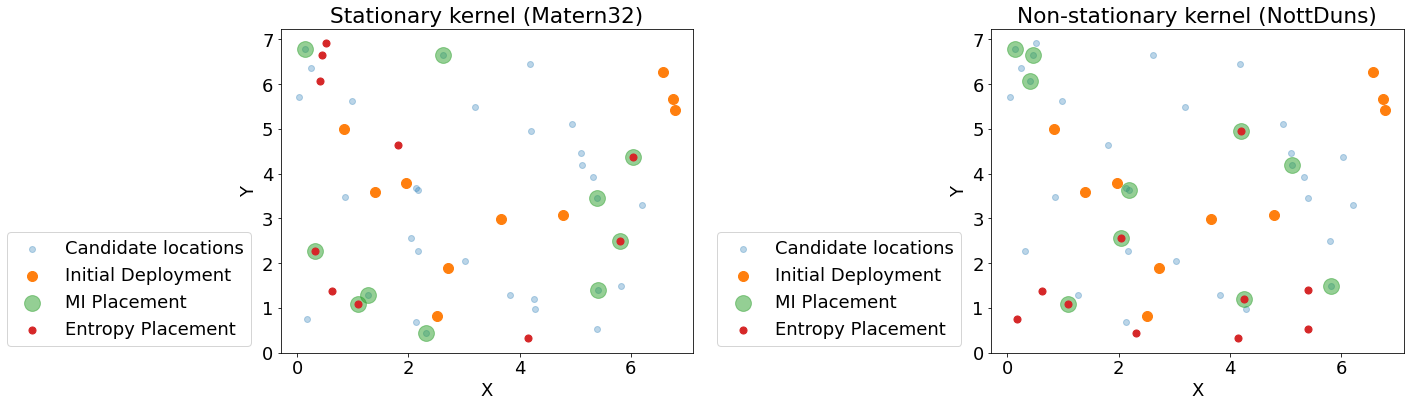




Testing with reasonable dataset (Temperature dataset)





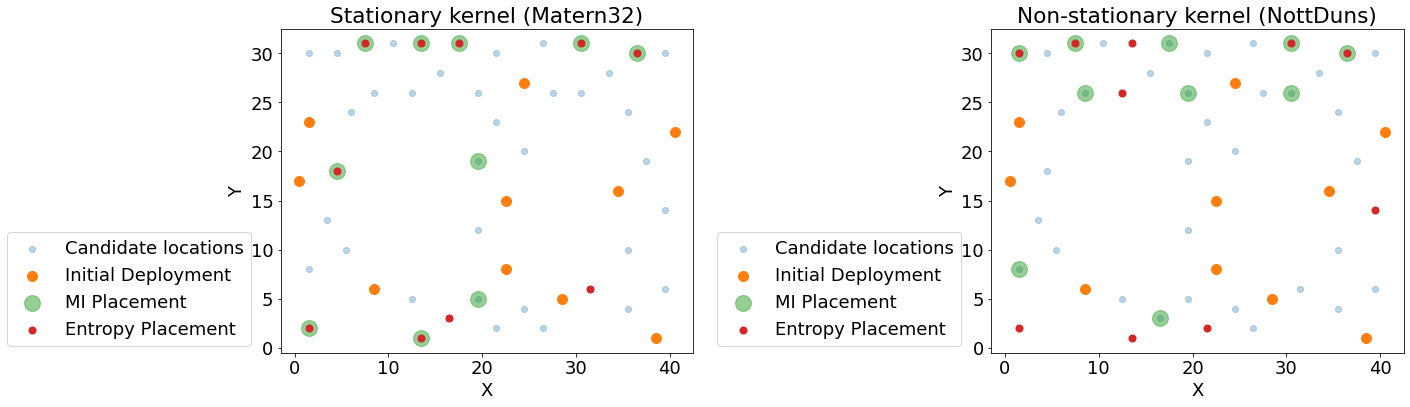

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from polire.placement import NottDuns, Stationary

# RC param
rc('font',size=18)
# np random seed
np.random.seed(42)

def place_and_plot(X_all, Y_all, ECM_all, init=10, place=10):
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    titles = ['Stationary kernel (Matern32)', 'Non-stationary kernel (NottDuns)']
    for idx, model in enumerate([Stationary(1, 'm32', False), NottDuns(5)]):
        np.random.seed(42)
        sample_index = np.random.choice(range(X_all.shape[0]), size=10, replace=False)
        X_sample = X_all[sample_index]
        Y_sample = Y_all[sample_index]
        ECM_sample = ECM_all[np.ix_(sample_index, sample_index)]
        model.fit(X_sample, Y_sample, ECM_sample)
        _, mi_loc = model.place(X_all, sample_index, place, method='MI')
        _, var_loc = model.place(X_all, sample_index, place, method='Entropy')
        ax[idx].set_xlabel('X')
        ax[idx].set_ylabel('Y')
        ax[idx].scatter(X_all[:, 0], X_all[:, 1], label='Candidate locations', alpha=0.3)
        ax[idx].scatter(X_sample[:, 0], X_sample[:, 1], label='Initial Deployment', s=100)
        ax[idx].scatter(mi_loc[:,0], mi_loc[:,1], label='MI Placement', s=250, alpha=0.5)
        ax[idx].scatter(var_loc[:,0], var_loc[:,1], label='Entropy Placement', s=50)
        ax[idx].legend(bbox_to_anchor=(-0.05,0.4))
        ax[idx].set_title(titles[idx])
    plt.tight_layout()
    plt.show()

print('Testing with random dataset\n\n\n')

rand_train_XY = np.random.rand(50,2)*np.random.randint(1,20)
rand_train_vals_data = np.random.rand(50,10)*np.random.randint(1,20)
rand_train_vals = rand_train_vals_data.mean(axis=1).reshape(-1,1)
rand_ECM = (rand_train_vals_data - rand_train_vals)\
            .dot((rand_train_vals_data - rand_train_vals).T)/rand_train_XY.shape[0]

place_and_plot(rand_train_XY, rand_train_vals, rand_ECM, init=10, place=10)

print('\n\n\nTesting with reasonable dataset (Temperature dataset)\n\n\n')

with open('testdata/temp_train_xy.npy', 'rb') as f:
    train_XY = np.load(f)
with open('testdata/temp_train_vals.npy', 'rb') as f:
    train_vals = np.load(f)
with open('testdata/temp_train_ECM.npy', 'rb') as f:
    train_ECM = np.load(f)

place_and_plot(train_XY, train_vals, train_ECM, init=10, place=10)